In [1]:
pwd

'/global/cscratch1/sd/krzywins/CRYSTALBPMExpl/crystal-fft-bpm/examples'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (8,7)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [4]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
import XCrTools as tools
omega0 = 12800.0

xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump.yaml', omega0)
xtools = tools.XCrTools(xcr)



In [5]:
pwd

'/global/cscratch1/sd/krzywins/CRYSTALBPMExpl/crystal-fft-bpm/examples'

In [6]:
U1file = 'run_omega_U1_46_16_C400_9831eVBump.npy'
U2file = 'run_omega_U2_46_16_C400_9831eVBump.npy'

U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)

In [7]:
U1_wxyz.shape


(736, 4267, 1, 185)

In [8]:
IJ=150

(0.0, 730.0)

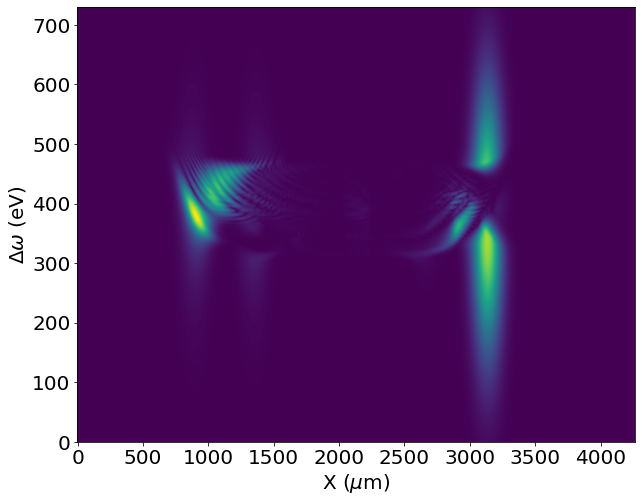

In [9]:
#extent = [0, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim), np.min(w_sim)]
#GnBu
plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_wxyz[:, :,0,IJ])**1 + np.abs(U2_wxyz[:,:,0,IJ])**1, aspect='auto')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega$ (eV)')

plt.ylim(0, 730)

##### tgrid = 5200*2
    tmax = 1000 * 1.0e-15
    sigma_t =1 * 2.0e-15
    t = np.linspace(0,tmax,tgrid)
    dt = t[1] - t[0]
    coeff = 2.0 * np.pi * xcr.hbar
    w = np.fft.fftshift(coeff * np.fft.fftfreq(tgrid + 2 *xcr.tpad, dt)) + 0.2
    
    t_crop = 25
    w_sim = w[int(len(w)/2 - len(w)/t_crop/2):int(len(w)/2 + len(w)/t_crop/2)]
    w_sim= np.transpose(np.tile(w_sim[0:736],[4267,1]))
    w_sim.shape

In [10]:
U1_wx = U1_wxyz[:, :, 0, :]
U2_wx = U2_wxyz[:, :, 0, :]

U1_tx = np.fft.ifft(U1_wx, axis=0)
U2_tx = np.fft.ifft(U2_wx, axis=0)


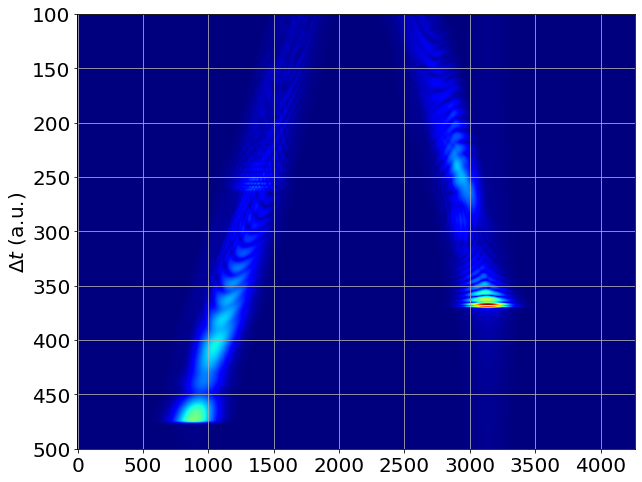

In [11]:
It=150
U1_txIt=U1_tx[:,:,It];
U2_txIt=U2_tx[:,:,It];

plt.figure(figsize=(10,8))
plt.imshow(np.abs(U1_txIt+U2_txIt*1)**0.5, aspect='auto', cmap='jet')
plt.ylabel(r'$\Delta t$ (a.u.)')
plt.ylim(500,100)
plt.grid()
plt.show()
